# Agrupación y Segmentación de Vecindarios en la Ciudad de Toronto, Canadá

In [151]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup

import json # librería para manejar archivos JSON 

!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare


Libraries imported.


In [150]:
pip install geopy

In [152]:
# Definir URL
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1008658788'
table_class='wikitable sortable jquery-tablesorter'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
torontotable=soup.find('table',{'class':"wikitable"})

In [153]:
# Obtener tabla
df=pd.read_html(str(torontotable))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.head(11)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [154]:
#Eliminar filas 
index_NoAsignado = df[df["Borough"]=='Not assigned'].index
df=df.drop(index_NoAsignado)
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [155]:
df = df.reset_index(drop=True)
df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [156]:
df.shape

(103, 3)

# Coordenadas

In [157]:
#Leer archivo CSV de coordenadas
df_coordenadas = pd.read_csv(r'C:\Users\jaimea.munoz\Documents\DATA SCIENCE\Curso 9 Final\Geospatial_Coordinates.csv')
df_coordenadas.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [158]:
#Combinar mi DataFrame con la tabla de coordenadas
df = pd.merge(df, df_coordenadas)
df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [159]:
#Trabajar solo con los vecindarios de Toronto
df = df[df.Borough.str.contains('Toronto')].reset_index(drop=True)
df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


# Determinar coordenadas de la ciudad de Toronto

In [160]:
adress = 'Toronto'

geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(adress)
latitude = location.latitude
longitude = location.longitude
print('las coordenadas de ', adress, 'son {}, {}'.format(latitude, longitude) )

las coordenadas de  Toronto son 43.6534817, -79.3839347


# Generar mapa de Toronto

In [163]:
#Crear un mapa de  Toronto
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

#Añadir marcadores al mapa
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
    
map_toronto

# Definir la versión y credenciales de FourSquare

In [164]:
CLIENT_ID = 'N5LPL5YGBPLQ4RHJJWHJYN4RKXNVR0J3OTMOC35S00UVPFWL' # su ID de Foursquare
CLIENT_SECRET = 'OG2J1Z54UD2ATX3MD4SEYSAI5FCZUJBKDE2POA5ZIJDXIC1C' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N5LPL5YGBPLQ4RHJJWHJYN4RKXNVR0J3OTMOC35S00UVPFWL
CLIENT_SECRET:OG2J1Z54UD2ATX3MD4SEYSAI5FCZUJBKDE2POA5ZIJDXIC1C


In [166]:
#Explorar el primer barrio del DataFrame
df.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

In [167]:
#Obtener coordenadas
neighborhood_latitude = df.loc[0, 'Latitude']
neighborhood_longitude = df.loc[0, 'Longitude']
neighborhood_name = df.loc[0, 'Neighbourhood']

In [168]:
print("las coordenadas del barrio {}, son {}, {}".format(neighborhood_name,
                                                         neighborhood_latitude,
                                                         neighborhood_longitude
                                                        ))

las coordenadas del barrio Regent Park, Harbourfront, son 43.6542599, -79.3606359


# Obtengamos los 100 sitios en Regent Park, Harbourfront en un radio de 500 metros

In [169]:
radius = 500
limit = 100
url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}".format(CLIENT_ID,
                                                                                                                        CLIENT_SECRET,
                                                                                                                        VERSION,
                                                                                                                        neighborhood_latitude,
                                                                                                                        neighborhood_longitude,
                                                                                                                        limit,
                                                                                                                        radius)
url

'https://api.foursquare.com/v2/venues/explore?client_id=N5LPL5YGBPLQ4RHJJWHJYN4RKXNVR0J3OTMOC35S00UVPFWL&client_secret=OG2J1Z54UD2ATX3MD4SEYSAI5FCZUJBKDE2POA5ZIJDXIC1C&v=20180605&ll=43.6542599,-79.3606359&limit=100&radius=500'

In [170]:
#Enviar la solicitud
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '612facc94a709052a92f1153'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [171]:
# función para extraer la categoria del sitio
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [172]:
#Ahora estamos listos para limpiar el objeto json y estructurarlo en un dataframe pandas
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # objeto JSON

# filtrar columnas
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtrar la categoría para cada fila
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# limpiar columnas
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-172-7b8928da2fc8>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # objeto JSON


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Impact Kitchen,Restaurant,43.656369,-79.356980
4,Dominion Pub and Kitchen,Pub,43.656919,-79.358967


In [173]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


In [174]:
# Explorar bariios de Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [175]:
url

'https://api.foursquare.com/v2/venues/explore?client_id=N5LPL5YGBPLQ4RHJJWHJYN4RKXNVR0J3OTMOC35S00UVPFWL&client_secret=OG2J1Z54UD2ATX3MD4SEYSAI5FCZUJBKDE2POA5ZIJDXIC1C&v=20180605&ll=43.6542599,-79.3606359&limit=100&radius=500'

In [176]:
# Ahora escriba el código para ejecutar la función anterior en cada vecindario y crear un nuevo dataframe llamado toronto venues

toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [177]:
# Revisemos el tamaño del dataframe resultante
print(toronto_venues.shape)
toronto_venues.head()

(1636, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [178]:
#Encontremos cuantas categorías únicas se pueden conservar de todos los sitios regresados

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


In [179]:
#Analizar cada barrio
# codificación
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']])

# añadir la columna de barrio de regreso al dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# mover la columna de barrio a la primer columna
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Venue Category_Afghan Restaurant,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Arepa Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Baby Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Basketball Stadium,Venue Category_Beach,Venue Category_Bed & Breakfast,Venue Category_Beer Bar,Venue Category_Beer Store,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Brazilian Restaurant,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Bubble Tea Shop,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Line,Venue Category_Bus Stop,Venue Category_Butcher,Venue Category_Café,Venue Category_Cajun / Creole Restaurant,Venue Category_Candy Store,Venue Category_Caribbean Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Church,Venue Category_Climbing Gym,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_College Arts Building,Venue Category_College Auditorium,Venue Category_College Gym,Venue Category_College Rec Center,Venue Category_Colombian Restaurant,Venue Category_Comfort Food Restaurant,Venue Category_Comic Shop,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Coworking Space,Venue Category_Creperie,Venue Category_Cuban Restaurant,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Distribution Center,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Escape Room,Venue Category_Ethiopian Restaurant,Venue Category_Event Space,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_Fountain,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Gaming Cafe,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gas Station,Venue Category_Gastropub,Venue Category_Gay Bar,Venue Category_General Entertainment,Venue Category_General Travel,Venue Category_German Restaurant,Venue Category_Gift Shop,Venue Category_Gluten-free Restaurant,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Harbor / Marina,Venue Category_Health & Beauty Service,Venue Category_Health Food Store,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hobby Shop,Venue Category_Home Service,Venue Category_Hookah Bar,Venue Category_Hospital,Venue Category_Hostel,Venue Category_Hot Dog Joint,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indie Movie Theater,Venue Category_Indoor Play Area,Venue Category_Intersection,Venue Category_Irish P

In [180]:
toronto_onehot.shape

(1636, 240)

In [186]:
toronto_onehot['liststring'] = [','.join(map(str, l)) for l in toronto_onehot['Neighborhood']]

In [187]:
toronto_onehot.head()

,Neighborhood,Venue Category_Afghan Restaurant,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Arepa Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Baby Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Basketball Stadium,Venue Category_Beach,Venue Category_Bed & Breakfast,Venue Category_Beer Bar,Venue Category_Beer Store,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Brazilian Restaurant,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Bubble Tea Shop,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Line,Venue Category_Bus Stop,Venue Category_Butcher,Venue Category_Café,Venue Category_Cajun / Creole Restaurant,Venue Category_Candy Store,Venue Category_Caribbean Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Church,Venue Category_Climbing Gym,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_College Arts Building,Venue Category_College Auditorium,Venue Category_College Gym,Venue Category_College Rec Center,Venue Category_Colombian Restaurant,Venue Category_Comfort Food Restaurant,Venue Category_Comic Shop,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Coworking Space,Venue Category_Creperie,Venue Category_Cuban Restaurant,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Distribution Center,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Escape Room,Venue Category_Ethiopian Restaurant,Venue Category_Event Space,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_Fountain,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Gaming Cafe,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gas Station,Venue Category_Gastropub,Venue Category_Gay Bar,Venue Category_General Entertainment,Venue Category_General Travel,Venue Category_German Restaurant,Venue Category_Gift Shop,Venue Category_Gluten-free Restaurant,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Harbor / Marina,Venue Category_Health & Beauty Service,Venue Category_Health Food Store,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hobby Shop,Venue Category_Home Service,Venue Category_Hookah Bar,Venue Category_Hospital,Venue Category_Hostel,Venue Category_Hot Dog Joint,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indie Movie Theater,Venue Category_Indoor Play Area,Venue Category_Intersection,Venue Category_Irish P

In [184]:
#Agrupemos las filas por barrios tomando la média de la frecuancia de la ocurrencia de cada categoría
toronto_grouped = toronto_onehot.groupby('liststring').mean().reset_index()
toronto_grouped.head()

,liststring,Venue Category_Afghan Restaurant,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Arepa Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Baby Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Basketball Stadium,Venue Category_Beach,Venue Category_Bed & Breakfast,Venue Category_Beer Bar,Venue Category_Beer Store,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Brazilian Restaurant,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Bubble Tea Shop,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Line,Venue Category_Bus Stop,Venue Category_Butcher,Venue Category_Café,Venue Category_Cajun / Creole Restaurant,Venue Category_Candy Store,Venue Category_Caribbean Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Church,Venue Category_Climbing Gym,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_College Arts Building,Venue Category_College Auditorium,Venue Category_College Gym,Venue Category_College Rec Center,Venue Category_Colombian Restaurant,Venue Category_Comfort Food Restaurant,Venue Category_Comic Shop,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Coworking Space,Venue Category_Creperie,Venue Category_Cuban Restaurant,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Distribution Center,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Escape Room,Venue Category_Ethiopian Restaurant,Venue Category_Event Space,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant,Venue Category_Filipino Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_Fountain,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Gaming Cafe,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gas Station,Venue Category_Gastropub,Venue Category_Gay Bar,Venue Category_General Entertainment,Venue Category_General Travel,Venue Category_German Restaurant,Venue Category_Gift Shop,Venue Category_Gluten-free Restaurant,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Harbor / Marina,Venue Category_Health & Beauty Service,Venue Category_Health Food Store,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hobby Shop,Venue Category_Home Service,Venue Category_Hookah Bar,Venue Category_Hospital,Venue Category_Hostel,Venue Category_Hot Dog Joint,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indie Movie Theater,Venue Category_Indoor Play Area,Venue Category_Intersection,Venue Category_Irish Pub

In [188]:
toronto_grouped.rename(columns = {'liststring':'Neighborhood'}, inplace = True)

In [189]:
#Imprimir cada barrio junto con los 5 sitios mas comunes
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print('----',hood,'----')
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- B,e,r,c,z,y, ,P,a,r,k ----
                               venue  freq
0         Venue Category_Coffee Shop  0.07
1              Venue Category_Bakery  0.05
2        Venue Category_Cocktail Bar  0.05
3            Venue Category_Pharmacy  0.03
4  Venue Category_Seafood Restaurant  0.03


---- B,r,o,c,k,t,o,n,,, ,P,a,r,k,d,a,l,e, ,V,i,l,l,a,g,e,,, ,E,x,h,i,b,i,t,i,o,n, ,P,l,a,c,e ----
                           venue  freq
0            Venue Category_Café  0.13
1  Venue Category_Breakfast Spot  0.09
2     Venue Category_Coffee Shop  0.09
3       Venue Category_Nightclub  0.09
4          Venue Category_Bakery  0.04


---- B,u,s,i,n,e,s,s, ,r,e,p,l,y, ,m,a,i,l, ,P,r,o,c,e,s,s,i,n,g, ,C,e,n,t,r,e,,, ,S,o,u,t,h, ,C,e,n,t,r,a,l, ,L,e,t,t,e,r, ,P,r,o,c,e,s,s,i,n,g, ,P,l,a,n,t, ,T,o,r,o,n,t,o ----
                               venue  freq
0  Venue Category_Light Rail Station  0.12
1         Venue Category_Pizza Place  0.06
2       Venue Category_Auto Workshop  0.06
3             Venue Cate

In [190]:
#Primero escribamos una función para ordenar los sitios en orden descendente.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [191]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"B,e,r,c,z,y, ,P,a,r,k",Venue Category_Coffee Shop,Venue Category_Cocktail Bar,Venue Category_Bakery,Venue Category_Seafood Restaurant,Venue Category_Farmers Market,Venue Category_Restaurant,Venue Category_Cheese Shop,Venue Category_Pharmacy,Venue Category_Beer Bar,Venue Category_Clothing Store
1,"B,r,o,c,k,t,o,n,,, ,P,a,r,k,d,a,l,e, ,V,i,l,l,...",Venue Category_Café,Venue Category_Nightclub,Venue Category_Coffee Shop,Venue Category_Breakfast Spot,Venue Category_Grocery Store,Venue Category_Intersection,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Gym,Venue Category_Climbing Gym
2,"B,u,s,i,n,e,s,s, ,r,e,p,l,y, ,m,a,i,l, ,P,r,o,...",Venue Category_Light Rail Station,Venue Category_Gym / Fitness Center,Venue Category_Auto Workshop,Venue Category_Comic Shop,Venue Category_Pizza Place,Venue Category_Restaurant,Venue Category_Burrito Place,Venue Category_Brewery,Venue Category_Skate Park,Venue Category_Smoke Shop
3,"C,N, ,T,o,w,e,r,,, ,K,i,n,g, ,a,n,d, ,S,p,a,d,...",Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_Harbor / Marina,Venue Category_Sculpture Garden,Venue Category_Coffee Shop,Venue Category_Plane,Venue Category_Boat or Ferry,Venue Category_Rental Car Location,Venue Category_Airport Food Court
4,"C,e,n,t,r,a,l, ,B,a,y, ,S,t,r,e,e,t",Venue Category_Coffee Shop,Venue Category_Café,Venue Category_Sandwich Place,Venue Category_Italian Restaurant,Venue Category_Bubble Tea Shop,Venue Category_Salad Place,Venue Category_Burger Joint,Venue Category_Restaurant,Venue Category_Department Store,Venue Category_Japanese Restaurant


In [192]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

#  Barrios Agrupados Ejecutemos k-means para agrupar los barrios en 5 agrupaciones

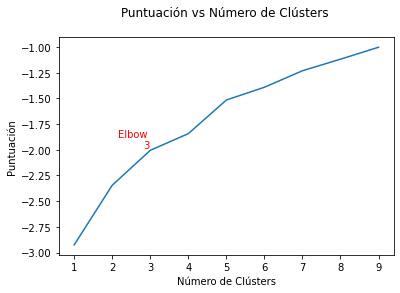

In [193]:

import matplotlib.pyplot as plt
Nc = range(1, 10)

dt_elbow=pd.DataFrame()

for i in Nc:
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    score = kmeans.fit(toronto_grouped_clustering).score(toronto_grouped_clustering)

    dt_elbow.loc[i, 0] = i
    dt_elbow.loc[i, 1] = score
    
dt_elbow.rename(columns={0: 'k', 1: 'score'}, inplace=True) #Reemplacemos los nombres de las columnas
   
#Plot the Elbow curve
plt.plot(dt_elbow['k'],dt_elbow['score'])

for i, row in dt_elbow.iterrows():
    if i == 3:
        plt.text(i, row['score'], str('Elbow \n {}'.format(i)), ha='right', va='bottom', color='red')
    

plt.xlabel('Número de Clústers')
plt.ylabel('Puntuación')
plt.title('Puntuación vs Número de Clústers \n')
#plt.savefig('../Images/Result2/img09_curvaelbow.png')
plt.show()

In [194]:
# establecer el número de agrupaciones
kclusters = 2

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [195]:
#Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio

# añadir etiquetas
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [197]:
df['liststring'] = [','.join(map(str, l)) for l in df['Neighbourhood']]

In [199]:
df = df.drop('Neighbourhood',1)

In [200]:
df.rename(columns = {'liststring':'Neighborhood'}, inplace = True)
df.head()

,Postal Code,Borough,Latitude,Longitude,Neighborhood
0,M5A,Downtown Toronto,43.654260,-79.360636,"R,e,g,e,n,t, ,P,a,r,k,,, ,H,a,r,b,o,u,r,f,r,o,n,t"
1,M7A,Downtown Toronto,43.662301,-79.389494,"Q,u,e,e,n,',s, ,P,a,r,k,,, ,O,n,t,a,r,i,o, ,P,..."
2,M5B,Downtown Toronto,43.657162,-79.378937,"G,a,r,d,e,n, ,D,i,s,t,r,i,c,t,,, ,R,y,e,r,s,o,n"
3,M5C,Downtown Toronto,43.651494,-79.375418,"S,t,., ,J,a,m,e,s, ,T,o,w,n"
4,M4E,East Toronto,43.676357,-79.293031,"T,h,e, ,B,e,a,c,h,e,s"


In [201]:
toronto_merged = df


toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # revisar las ultimas columnas

,Postal Code,Borough,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,43.654260,-79.360636,"R,e,g,e,n,t, ,P,a,r,k,,, ,H,a,r,b,o,u,r,f,r,o,n,t",0,Venue Category_Coffee Shop,Venue Category_Café,Venue Category_Pub,Venue Category_Bakery,Venue Category_Park,Venue Category_Restaurant,Venue Category_Theater,Venue Category_Shoe Store,Venue Category_Farmers Market,Venue Category_Breakfast Spot
1,M7A,Downtown Toronto,43.662301,-79.389494,"Q,u,e,e,n,',s, ,P,a,r,k,,, ,O,n,t,a,r,i,o, ,P,...",0,Venue Category_Coffee Shop,Venue Category_Café,Venue Category_Yoga Studio,Venue Category_Sandwich Place,Venue Category_Burrito Place,Venue Category_Smoothie Shop,Venue Category_Beer Bar,Venue Category_Japanese Restaurant,Venue Category_Italian Restaurant,Venue Category_Mexican Restaurant
2,M5B,Downtown Toronto,43.657162,-79.378937,"G,a,r,d,e,n, ,D,i,s,t,r,i,c,t,,, ,R,y,e,r,s,o,n",0,Venue Category_Coffee Shop,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Japanese Restaurant,Venue Category_Cosmetics Shop,Venue Category_Middle Eastern Restaurant,Venue Category_Bubble Tea Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Electronics Store
3,M5C,Downtown Toronto,43.651494,-79.375418,"S,t,., ,J,a,m,e,s, ,T,o,w,n",0,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Cocktail Bar,Venue Category_Cosmetics Shop,Venue Category_Italian Restaurant,Venue Category_Clothing Store,Venue Category_Gastropub,Venue Category_Department Store,Venue Category_Hotel
4,M4E,East Toronto,43.676357,-79.293031,"T,h,e, ,B,e,a,c,h,e,s",0,Venue Category_Health Food Store,Venue Category_Asian Restaurant,Venue Category_Neighborhood,Venue Category_Pub,Venue Category_Trail,Venue Category_Donut Shop,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Dumpling Restaurant


In [202]:
# crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [203]:
# Agrupacion 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Venue Category_Coffee Shop,Venue Category_Café,Venue Category_Pub,Venue Category_Bakery,Venue Category_Park,Venue Category_Restaurant,Venue Category_Theater,Venue Category_Shoe Store,Venue Category_Farmers Market,Venue Category_Breakfast Spot
1,Downtown Toronto,0,Venue Category_Coffee Shop,Venue Category_Café,Venue Category_Yoga Studio,Venue Category_Sandwich Place,Venue Category_Burrito Place,Venue Category_Smoothie Shop,Venue Category_Beer Bar,Venue Category_Japanese Restaurant,Venue Category_Italian Restaurant,Venue Category_Mexican Restaurant
2,Downtown Toronto,0,Venue Category_Coffee Shop,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Japanese Restaurant,Venue Category_Cosmetics Shop,Venue Category_Middle Eastern Restaurant,Venue Category_Bubble Tea Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Electronics Store
3,Downtown Toronto,0,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Cocktail Bar,Venue Category_Cosmetics Shop,Venue Category_Italian Restaurant,Venue Category_Clothing Store,Venue Category_Gastropub,Venue Category_Department Store,Venue Category_Hotel
4,East Toronto,0,Venue Category_Health Food Store,Venue Category_Asian Restaurant,Venue Category_Neighborhood,Venue Category_Pub,Venue Category_Trail,Venue Category_Donut Shop,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Dumpling Restaurant
5,Downtown Toronto,0,Venue Category_Coffee Shop,Venue Category_Cocktail Bar,Venue Category_Bakery,Venue Category_Seafood Restaurant,Venue Category_Farmers Market,Venue Category_Restaurant,Venue Category_Cheese Shop,Venue Category_Pharmacy,Venue Category_Beer Bar,Venue Category_Clothing Store
6,Downtown Toronto,0,Venue Category_Coffee Shop,Venue Category_Café,Venue Category_Sandwich Place,Venue Category_Italian Restaurant,Venue Category_Bubble Tea Shop,Venue Category_Salad Place,Venue Category_Burger Joint,Venue Category_Restaurant,Venue Category_Department Store,Venue Category_Japanese Restaurant
7,Downtown Toronto,0,Venue Category_Grocery Store,Venue Category_Café,Venue Category_Park,Venue Category_Restaurant,Venue Category_Italian Restaurant,Venue Category_Athletics & Sports,Venue Category_Candy Store,Venue Category_Nightclub,Venue Category_Coffee Shop,Venue Category_Baby Store
8,Downtown Toronto,0,Venue Category_Coffee Shop,Venue Category_Hotel,Venue Category_Café,Venue Category_Restaurant,Venue Category_Gym,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Cosmetics Shop,Venue Category_Thai Restaurant,Venue Category_Bar,Venue Category_Clothing Store
9,West Toronto,0,Venue Category_Pharmacy,Venue Category_Bakery,Venue Category_Grocery Store,Venue Category_Fast Food Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Music Venue,Venue Category_Park,Venue Category_Café,Venue Category_Bus Stop,Venue Category_Brewery


In [204]:
# Agrupacion 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,1,Venue Category_Park,Venue Category_Bus Line,Venue Category_Swim School,Venue Category_Yoga Studio,Venue Category_Distribution Center,Venue Category_Falafel Restaurant,Venue Category_Event Space,Venue Category_Ethiopian Restaurant,Venue Category_Escape Room,Venue Category_Electronics Store
29,Central Toronto,1,Venue Category_Park,Venue Category_Playground,Venue Category_Tennis Court,Venue Category_Trail,Venue Category_Yoga Studio,Venue Category_Donut Shop,Venue Category_Distribution Center,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant
33,Downtown Toronto,1,Venue Category_Park,Venue Category_Playground,Venue Category_Trail,Venue Category_Yoga Studio,Venue Category_Eastern European Restaurant,Venue Category_Dive Bar,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant
